In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('D:\\Programming\\Python\\py-master\\ML\\FeatureEngineering\\3_outlier_IQR\\Exercise\\height_weight.csv')
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <BarContainer object of 10 artists>)

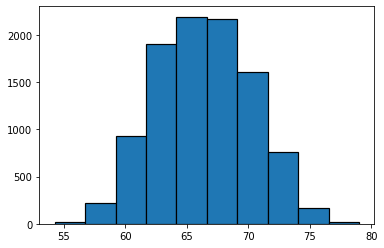

In [4]:
plt.hist(df['height'],edgecolor='black',linewidth=1.2)

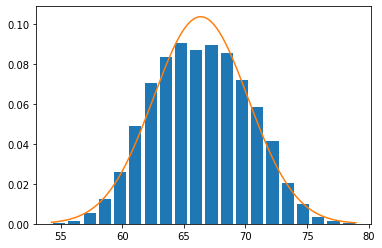

In [9]:
from scipy.stats import norm
plt.hist(df['height'], bins=20, rwidth=0.8, density=True)
rng=np.arange(df['height'].min(), df['height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 64.70012671,  85.22908389, 105.75804107, 126.28699825,
        146.81595543, 167.34491261, 187.87386979, 208.40282697,
        228.93178415, 249.46074133, 269.98969851]),
 <BarContainer object of 10 artists>)

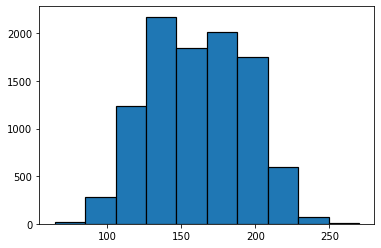

In [6]:
plt.hist(df['weight'],edgecolor='black',linewidth=1.2)

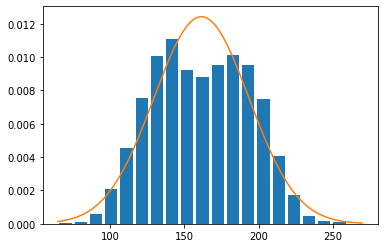

In [10]:
from scipy.stats import norm
plt.hist(df['weight'], bins=20, rwidth=0.8, density=True)

rng=np.arange(df['weight'].min(), df['weight'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['weight'].mean(),df['weight'].std()))

As we can see that both the graphs are of normal distribution we can apply IQR method to remove outliers since it is based on percentile  

## Detect outliers based on height  

In [11]:
Q1=df['height'].quantile(0.25)
Q3=df['height'].quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

In [12]:
IQR=Q3-Q1
IQR

5.668641245615746

In [13]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
upper_limit,lower_limit

(77.67722359525831, 55.00265861279534)

In [15]:
df_height=df[(df['height']>lower_limit)&(df['height']<upper_limit)]
df_height

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Detect Outliers based on weight

In [18]:
Q1=df['weight'].quantile(0.25)
Q3=df['weight'].quantile(0.75)
Q1,Q3

(135.8180513055015, 187.16952486868348)

In [19]:
IQR=Q3-Q1
IQR

51.35147356318197

In [20]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
upper_limit,lower_limit

(264.19673521345646, 58.79084096072856)

In [21]:
df_weight=df[(df['weight']>lower_limit)&(df['weight']<upper_limit)]
df_weight

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
